# Pseudo Random (การสุ่มเทียม)

Currently, <span style='color:Orange'>our computers cannot generate true randomness because they are fundamentally deterministic machines</span>: every operation follows fixed instructions, so the same input (or seed) always produces the same output. What computers actually produce are pseudo-random numbers, generated by algorithms such as the Mersenne Twister or linear congruential generators, which can mimic randomness but are entirely predictable if the seed and method are known.

In pseudo-random number generators (PRNGs), a seed is the initial value that determines the whole sequence of numbers.

## Deterministic Function
- Definition: A deterministic function always produces the same output for a given input.
- Key property: No randomness involved; completely predictable.
- Example:
$$f(x) = 2x + 3$$

## Stochastic Function
- Definition: A stochastic function includes randomness, so the same input can lead to different outputs.
- Key property: Predictability is lost because outcomes depend on chance.
- Example:
$$g(x)= 2x + \epsilon,\quad \epsilon\sim\mathcal{N}(\mu, \sigma)$$

In [56]:
def deterministic(x):
    return 2*x + 3

# always 13
for _ in range(10):
    print(deterministic(5))  

13
13
13
13
13
13
13
13
13
13


In [57]:
import random

In [69]:
random.seed(42)

def stochastic(x):
    epsilon = random.gauss(0, 1)  # noise from N(0,1)
    return 2*x + epsilon

# cann't be predicted
for _ in range(10):
    print(stochastic(5))  

9.855909670422072
9.82709639966848
9.888684138432337
10.701983725098863
9.872411716217114
8.502646585659043
10.332318344067716
9.732662521502832
9.783041315854804
10.115884786700855


## Chaotic Behavior and Sensitivity of Initial Condition.

In [42]:
import matplotlib.pyplot as plt

In [43]:
r = 1.8

# initialize function; the initial state
def initialize(init_x = 0.1):
    global x, result
    x = init_x
    result = [x]
    
# store results
def observe():
    global x, result
    result.append(x)
    
# update process
def update():
    global x, result
    x = x + r - x ** 2
    
# visualize results
def plot_asymptotic_behaviour(r, init_x = 0.1, symb = 'b-'):
    initialize(init_x)
    for _ in range(100): 
        update()
        observe()
    plt.plot(range(101), result, symb, alpha = 0.5, label = f'$x_0 = {init_x}$')

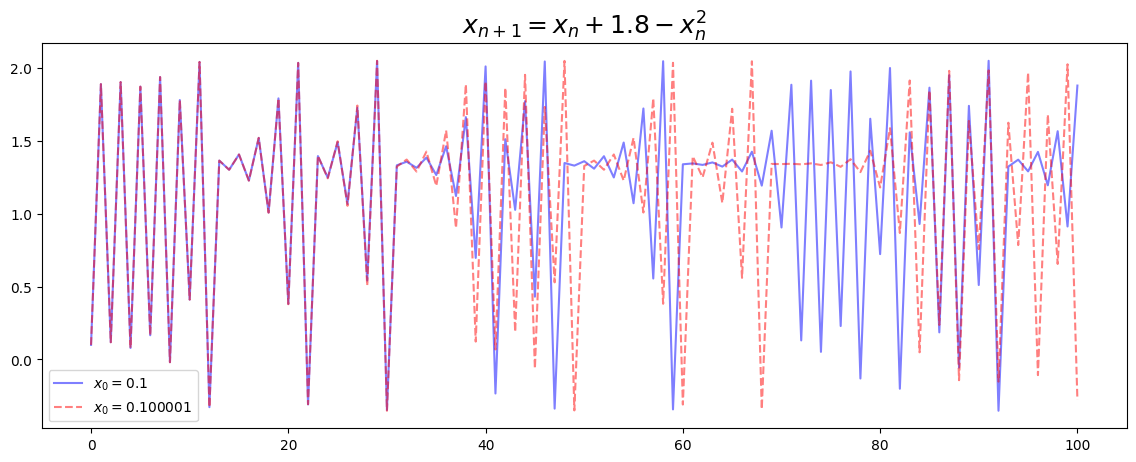

In [44]:
# Plot the results
plt.figure(figsize=(14, 5))
plot_asymptotic_behaviour(1.8, init_x = 0.1, symb = 'b-')
plot_asymptotic_behaviour(1.8, init_x = 0.100001, symb = 'r--')
plt.title('$x_{n+1} = x_n + 1.8 - x_n^2$', fontsize=18)
plt.legend();
plt.savefig('chaotic.png')

# Linear Congruential Generator (LCG) (classic PRNG)
Formula: $$X_{n+1} = (aX_n +c) \mod m$$

In [63]:
# Pseudo-random generator using LCG
class LCG:
    def __init__(self, seed=1, a=1664525, c=1013904223, m=2**32):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def rand(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state

In [65]:
# Example usage
gen = LCG(seed=110)
for _ in range(5):
    print(gen.rand())

1197001973
1099430352
590316271
3176846210
2986573049
